In [1]:
import torch
import torch.nn as nn
import torch.optim  as optim
import torchvision

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from utils.utils import *
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # add this, otherwise the model will easily died because of plt
%matplotlib inline
device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
def get_layer_output(layers, x, layer_choosed):
    output_lst = []
    for i in range(len(layers)):
        x = layers[i](x)
        if i in layer_choosed: 
            output_lst.append(x)
    return output_lst


def get_selected_layer_output(layers, x, layer_choosed):
    for i in range(len(layers)):
        x = layers[i](x)
        if i == layer_choosed: 
            return x

def compute_GRAM_matrix(input_data):
    _, c, h, w = input_data.shape
    input_data = input_data.squeeze().view(c, h*w)
    return input_data @ input_data.T

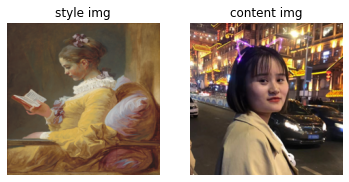

In [29]:
img_size = 224
content_img = Image.open("./imgs/jiao.jpg").convert("RGB").resize((img_size, img_size))
style_img = Image.open("./imgs/reading.jpg").convert("RGB").resize((img_size, img_size))
plt.subplot(1, 2, 1)
plt.imshow(style_img)
plt.title("style img")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(content_img)
plt.title("content img")
plt.axis("off")
content_img = preprocess(content_img, True).unsqueeze(0)
style_img = preprocess(style_img, True).unsqueeze(0)

In [30]:
model = torchvision.models.vgg16(pretrained=True).features
for param in model.parameters():
    param.requires_grad = False
for i in range(len(model)):
    if isinstance(model[i], nn.ReLU):
        model[i] = nn.ReLU(inplace=False)
    if isinstance(model[i], nn.MaxPool2d):
        model[i] = nn.AvgPool2d(2, 2)
model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU()
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU()
  (9): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU()
  (16): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (18): ReLU()
  (19): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (20): ReLU()
  (21): Conv2d(512, 512

In [49]:
# params
LEARNING_RATE = 1e-1
ITER_NUM = 2000
show_every = 100
WEIGHT_CONTENT = 1
WEIGHT_STYLE = 1e4
LAYER_FOR_STYLE = [0, 4, 9, 16]
LAYER_FOR_CONTENT = 7
WIGHT_OF_GRAM_MATRIX = [10, 0.1, 0.1, 0]

iter (0), loss (32532.818359 style 3.250868 content 24.135326)


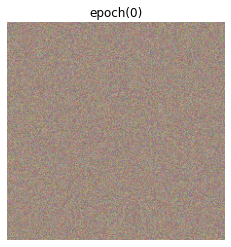

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (100), loss (113.111092 style 0.009285 content 20.263216)


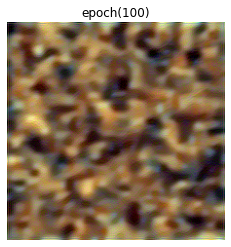

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (200), loss (25.247904 style 0.001371 content 11.536725)


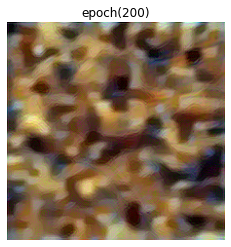

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (300), loss (15.912878 style 0.000718 content 8.737701)


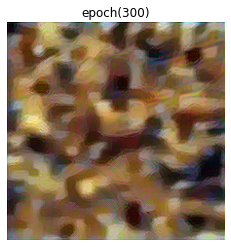

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (400), loss (11.758477 style 0.000458 content 7.179971)


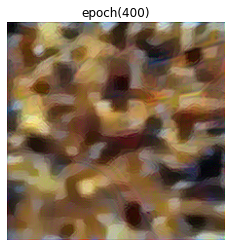

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (500), loss (9.430257 style 0.000327 content 6.158586)


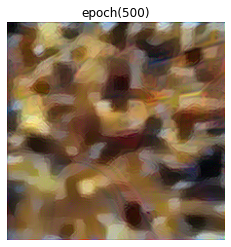

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (600), loss (7.944317 style 0.000252 content 5.427590)


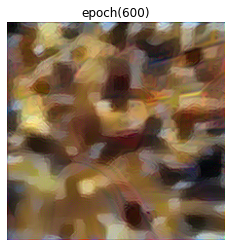

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (700), loss (6.934770 style 0.000204 content 4.892670)


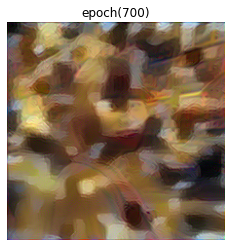

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (800), loss (6.218797 style 0.000173 content 4.493768)


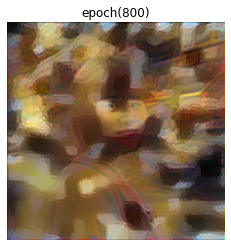

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (900), loss (5.683598 style 0.000150 content 4.182783)


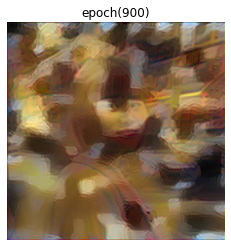

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (1000), loss (5.266114 style 0.000133 content 3.931282)


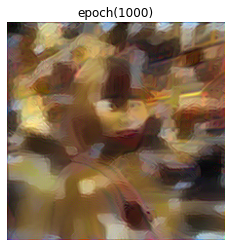

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (1100), loss (4.927341 style 0.000121 content 3.721665)


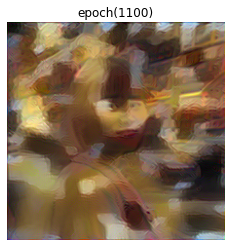

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (1200), loss (4.647510 style 0.000110 content 3.544950)


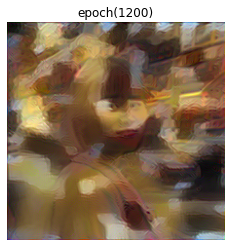

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (1300), loss (4.408822 style 0.000102 content 3.391349)


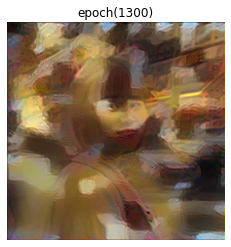

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (1400), loss (4.201712 style 0.000095 content 3.255141)


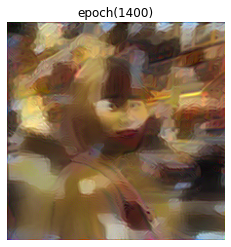

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (1500), loss (4.020057 style 0.000089 content 3.132979)


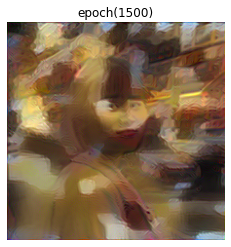

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (1600), loss (3.861198 style 0.000084 content 3.024644)


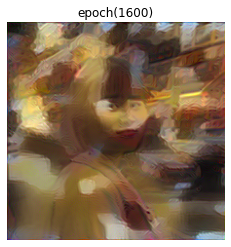

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (1700), loss (3.810735 style 0.000088 content 2.930567)


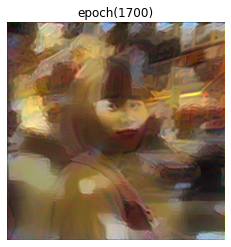

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (1800), loss (3.607622 style 0.000076 content 2.848791)


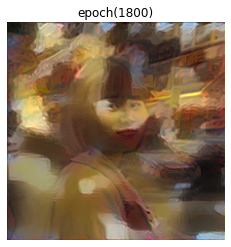

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (1900), loss (3.502947 style 0.000073 content 2.775913)


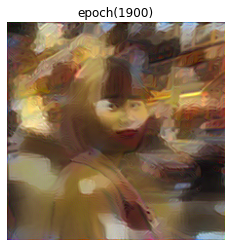

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter (2000), loss (3.482457 style 0.000077 content 2.708910)


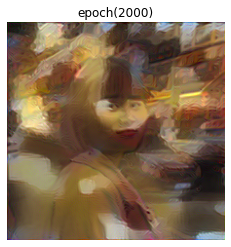

In [50]:
layers = model[: LAYER_FOR_STYLE[-1] + 1].to(device)

# compute content img's feature map
content_feature_map = get_selected_layer_output(layers, content_img.to(device), LAYER_FOR_CONTENT)

# compute style image's feature maps and then compute Gram matrix
style_feature_map = get_layer_output(layers, style_img.to(device), LAYER_FOR_STYLE)
style_GRAM_matrix = [compute_GRAM_matrix(each) for each in  style_feature_map]


# init a random noise, gradient descent on it to systhesis given texture.
"""
you can either start from a random noise, empty image, or the content img.
but use the content image is more easy, 
when using random noise, you  need to tune the content weight and tyle weight to make sure that:
the generated image looks like the content image, it may be annoying.
"""
noise = torch.rand_like(content_img).requires_grad_(True)
# noise = Variable(torch.zeros(1, 3, 224, 224), requires_grad=True)
# noise = torch.randn(1, 3, 224, 224).requires_grad_(True)


# define optimizer and loss function
# remind the learning rate here must be large, otherwise you may see nothing.
optimizer = torch.optim.Adam([noise], lr=LEARNING_RATE) # use [] instead of list()
style_criterion = nn.MSELoss()
content_criterion = nn.MSELoss()

for iter in range(ITER_NUM + 1):
    noise_feature_map = get_selected_layer_output(layers, noise.to(device), LAYER_FOR_CONTENT)
    noise_feature = get_layer_output(layers, noise.to(device), LAYER_FOR_STYLE)
    noise_GRAM_matrix = [compute_GRAM_matrix(each) for each in noise_feature]

    # compute loss:
    # total loss = content loss + style loss
    # content loss is computed by content image's selected layers output
    # style loss is computed by style image's GRAM matrix

    # compute style loss    
    style_loss = 0
    for i in range(len(noise_GRAM_matrix)):
        N, M = style_feature_map[i].shape[1], style_feature_map[i].shape[2]
        style_loss += style_criterion(style_GRAM_matrix[i], noise_GRAM_matrix[i]) / (4 * N **2 * M **2 ) * WIGHT_OF_GRAM_MATRIX[i]

    # compute content loss
    content_loss = content_criterion(content_feature_map[:,:4,...], noise_feature_map[:,:4,...])

    total_loss = content_loss * WEIGHT_CONTENT + style_loss * WEIGHT_STYLE

    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()



    if iter % show_every == 0:
        print(f"iter ({iter}), loss ({total_loss:5f} style {style_loss:5f} content {content_loss:5f})")
        res = noise.clone().detach()
        plt.imshow(np.array(deprocess(res.squeeze(0), True).permute(1,2,0)))
        plt.title(f"epoch({iter})")
        plt.axis("off")
        plt.show()
